# 网络流量分析

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from datetime import datetime

## 设定语系

In [3]:
import sys 
reload(sys)
sys.setdefaultencoding('gb2312')

gb_id = u'工号'.encode('gb2312')
gb_name = u'姓名'.encode('gb2312')
gb_datetime = u'日期时间'.encode('gb2312')
gb_type = u'类型'.encode('gb2312')
gb_url = u'网站'.encode('gb2312')
gb_volume = u'流量'.encode('gb2312')
gb_others = u'其他'.encode('gb2312')

## 载入数据

In [4]:
import os

data = pd.concat([pd.read_csv(f, index_col=gb_datetime, parse_dates=True) for f in os.listdir('.') if f.endswith('.csv')])
data.head()

,工号,姓名,类型,网站,流量,Unnamed: 6
日期时间,,,,,,
2017-04-10 08:34:19,315657,吕明宪,营销,::,0.02,NaN
2017-04-10 08:34:20,315657,吕明宪,iCloud,::,0.12,NaN
2017-04-10 08:34:20,315657,吕明宪,Microsoft数据,::,0.00,NaN
2017-04-10 08:34:20,315657,吕明宪,未识别应用,::,0.02,NaN
2017-04-10 08:34:21,315657,吕明宪,ICMP,::,0.00,NaN


## 总流量统计

In [5]:
# 总流量
data[gb_volume].sum()

2967.8000000000002

In [6]:
# 每日流量
daily_total = data.groupby(lambda dt: dt.date)[gb_volume].sum()
daily_total

2017-04-10    589.68
2017-04-11     26.40
2017-04-12    640.09
2017-04-13    256.37
2017-04-14     49.56
2017-04-15     86.39
2017-04-17    135.73
2017-04-18    211.59
2017-04-19      8.54
2017-04-20     25.16
2017-04-21     30.18
2017-04-24    177.21
2017-04-25     90.97
2017-04-26     62.52
2017-04-27     57.87
2017-04-28     49.08
2017-05-08    151.82
2017-05-09     62.55
2017-05-10     68.43
2017-05-11     56.93
2017-05-12     18.21
2017-05-13      3.87
2017-05-15     13.60
2017-05-16     28.17
2017-05-17     18.25
2017-05-18     13.19
2017-05-19     35.44
Name: 流量, dtype: float64

## 每日流量统计

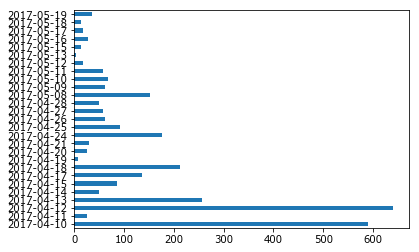

In [7]:
daily_total.plot.barh()

## 总流量分布

In [8]:
# 总流量分布
traffic_dist = data.groupby(gb_type)[gb_volume].sum().sort_values(ascending=False)
traffic_dist.head(10)

类型
百度音乐        1082.08
IT相关         460.43
未识别应用        259.33
OneDrive     179.63
搜索引擎         176.99
新闻门户          88.15
PC微信收文件       79.89
微信            74.74
其他企业网站        57.59
PC微信传文件       46.26
Name: 流量, dtype: float64

In [9]:
# 转换类型名称
def type_mapping(t):
    switcher = {
    u'百度音乐'.encode('gb2312'): 'Music',
    u'IT相关'.encode('gb2312'): 'IT related',
    u'OneDrive'.encode('gb2312'): 'OneDrive',
    u'未识别应用'.encode('gb2312'): 'Unknown',
    u'搜索引擎'.encode('gb2312'): 'Search Engine',
    u'PC微信收文件'.encode('gb2312'): 'Wechat file',
    u'新闻门户'.encode('gb2312'): 'News',
    u'PC微信传文件'.encode('gb2312'): 'Wechat file',
    u'微信'.encode('gb2312'): 'Wechat'}
    return switcher.get(t, 'Other')

data[gb_type] = data[gb_type].map(type_mapping)

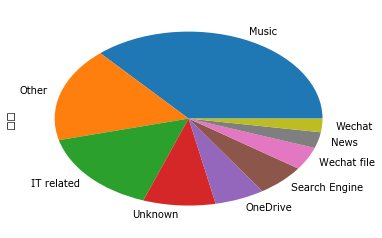

In [10]:
# Top 10 圆饼图
traffic_dist = data.groupby(gb_type)[gb_volume].sum().sort_values(ascending=False)
traffic_dist.head(10).plot.pie()

## 每日流量分布

In [11]:
daily_dist = data.groupby([lambda dt: dt.date, gb_type])[gb_volume].sum().unstack()
daily_dist

类型,IT related,Music,News,OneDrive,Other,Search Engine,Unknown,Wechat,Wechat file
2017-04-10,84.26,366.64,5.23,10.29,23.91,45.60,14.89,5.26,33.60
2017-04-11,1.31,NaN,1.21,10.17,5.95,0.13,1.97,1.80,3.86
2017-04-12,31.96,543.25,4.16,0.51,31.20,12.67,9.18,3.76,3.40
2017-04-13,27.63,172.19,1.22,10.20,22.37,4.77,7.24,4.09,6.66
2017-04-14,12.84,NaN,1.26,0.25,14.71,5.37,11.16,3.86,0.11
2017-04-15,31.91,NaN,1.02,0.22,18.04,10.59,17.30,1.39,5.92
2017-04-17,20.53,NaN,0.90,5.18,32.71,12.90,17.21,2.64,43.66
2017-04-18,18.00,NaN,3.03,135.47,28.14,7.47,13.82,3.21,2.45
2017-04-19,0.39,NaN,0.69,0.05,5.32,0.01,1.12,0.96,NaN
2017-04-20,0.63,NaN,10.29,0.12,9.86,0.02,3.41,0.83,NaN


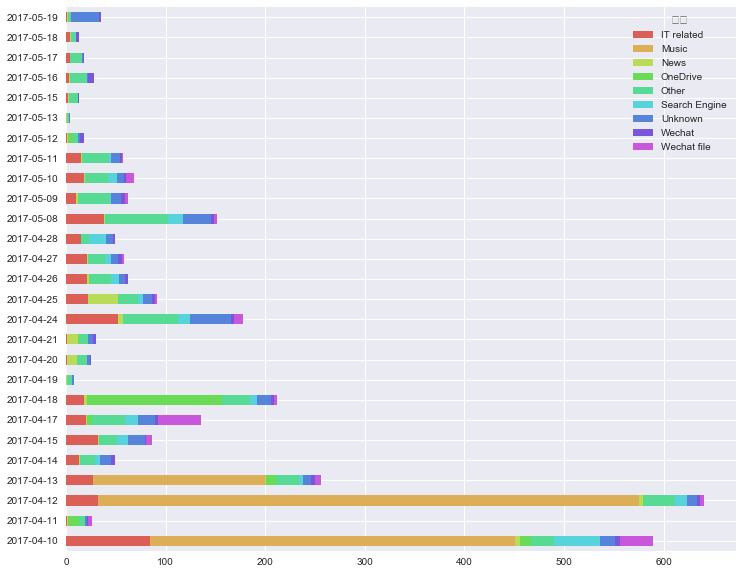

In [12]:
import seaborn as sns
color = sns.color_palette("hls", 10)

ax = daily_dist.plot.barh(stacked=True, figsize=(12,10), color = color)

## 每日流量累计

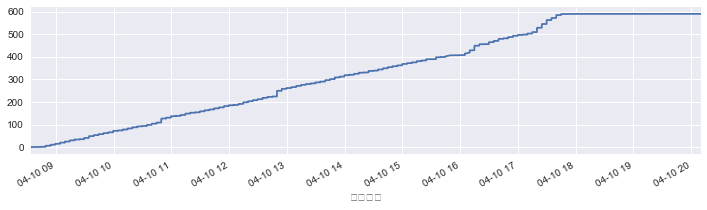

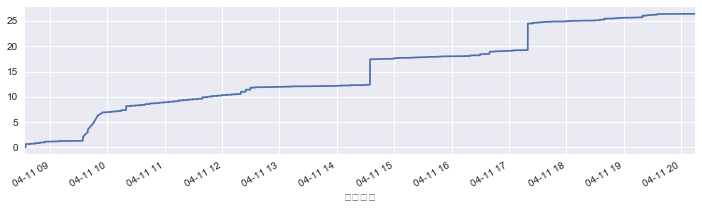

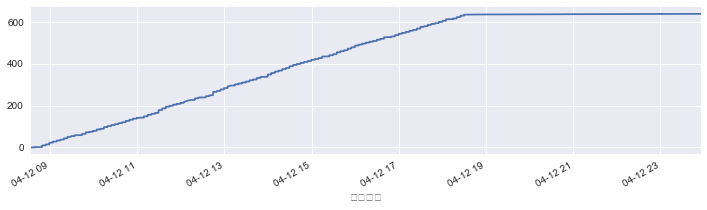

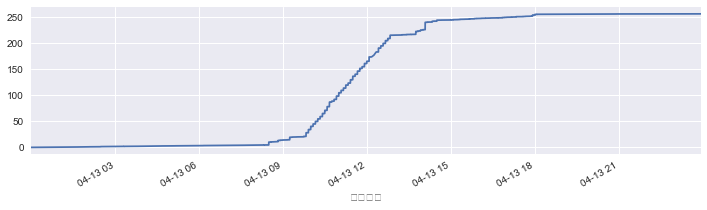

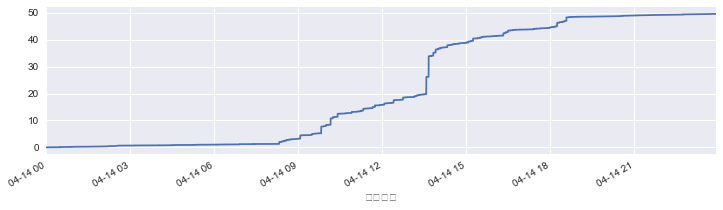

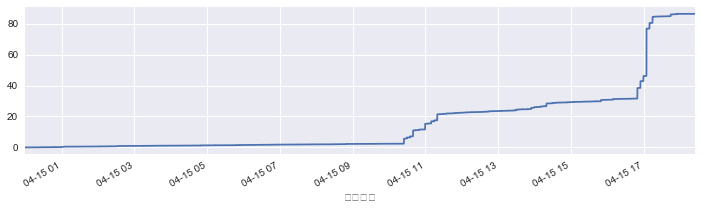

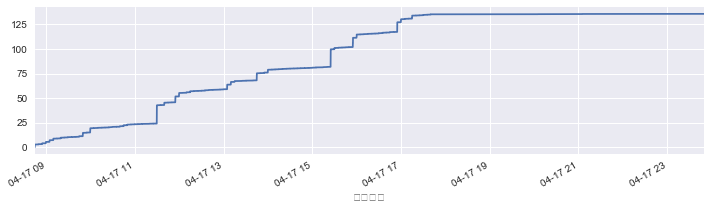

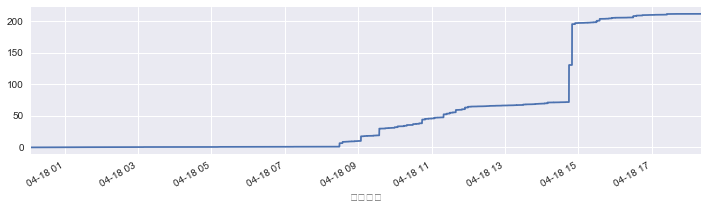

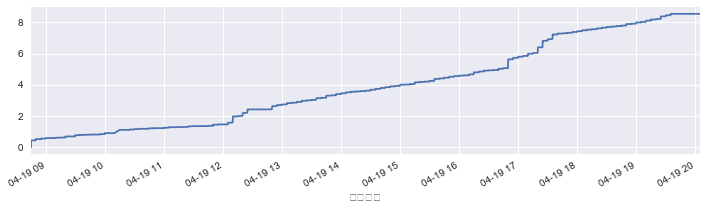

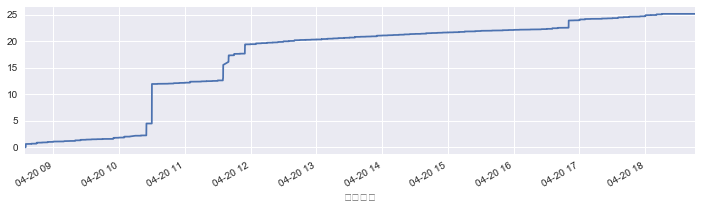

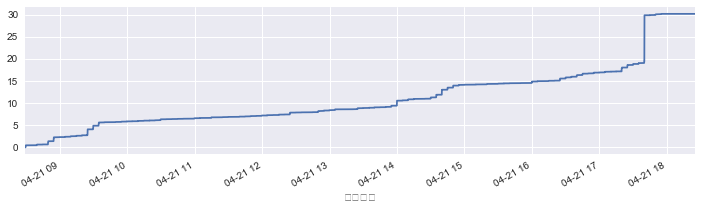

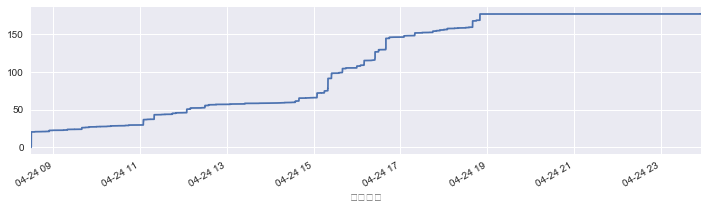

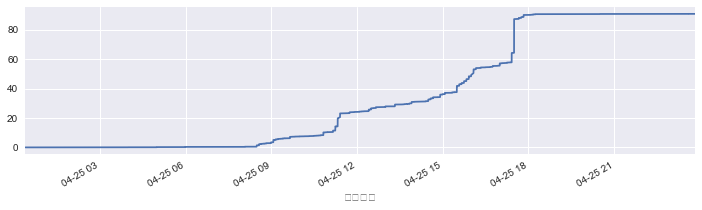

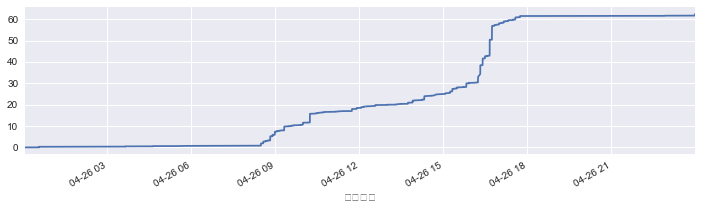

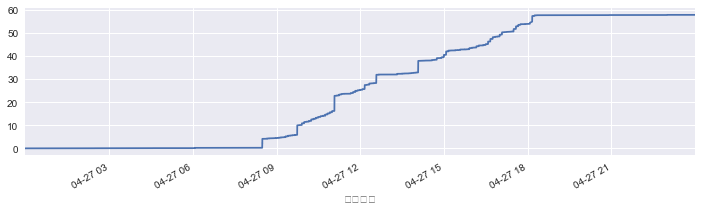

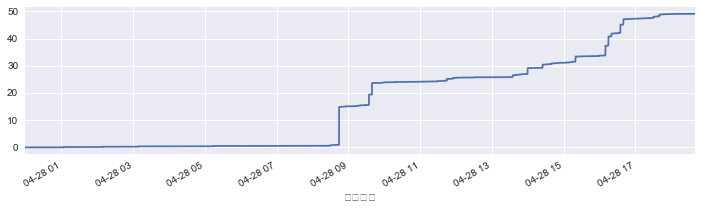

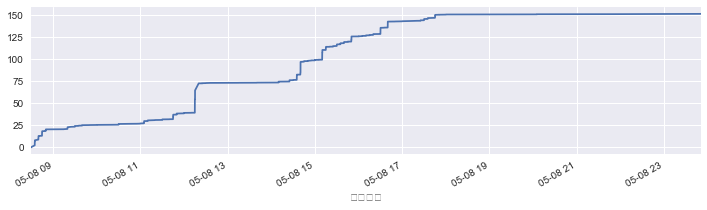

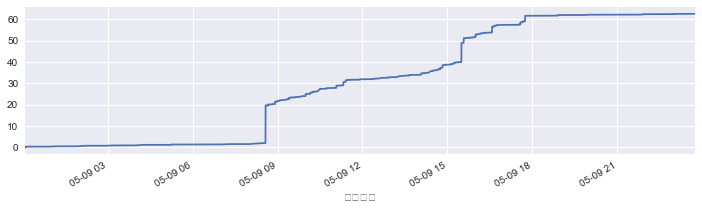

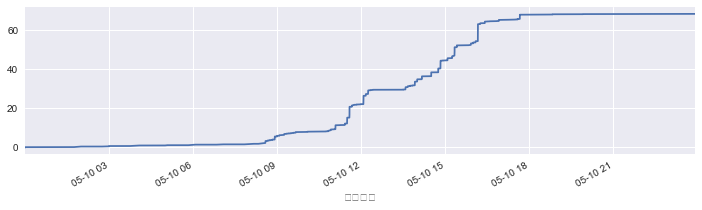

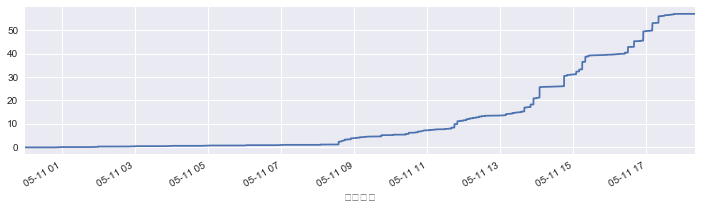

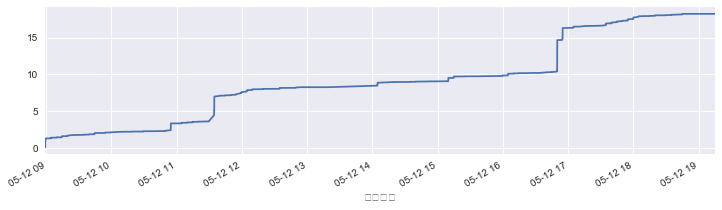

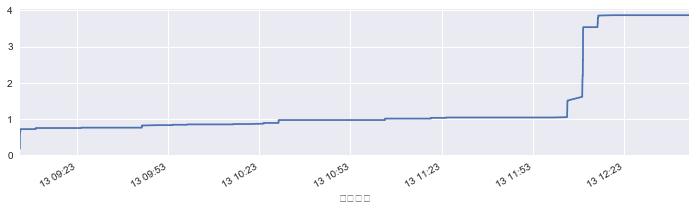

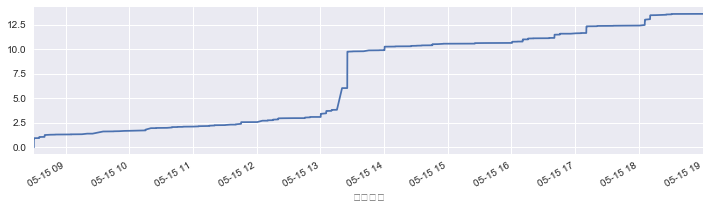

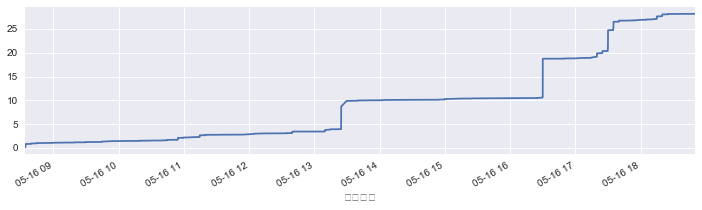

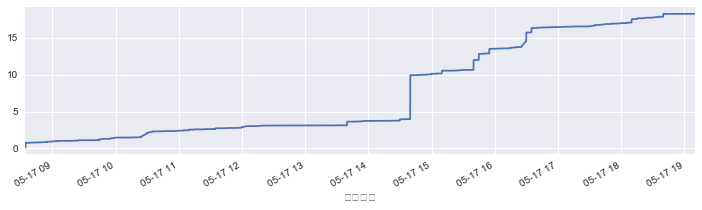

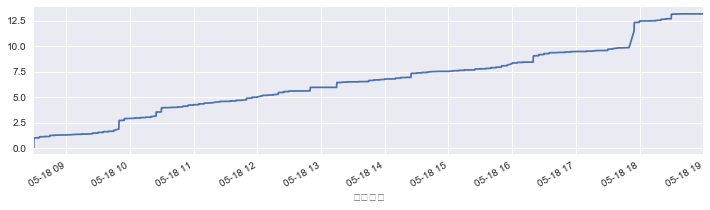

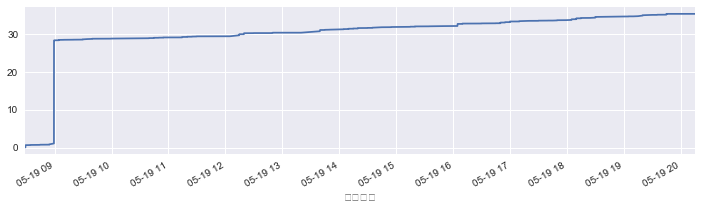

In [13]:
def cumsum_plot(data):
    fig = plt.figure(figsize=(12,3))
    ax = fig.add_subplot(1,1,1)
    data.cumsum().plot(ax=ax)

_ = data.groupby(lambda dt: dt.date)[gb_volume].apply(cumsum_plot)